# 📝 Exercise M6.02

The aim of this exercise it to **explore some attributes** available **in
scikit-learn random forest**.

First, we will fit the **penguins regression dataset**.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_names = ["Flipper Length (mm)"]
target_name = "Body Mass (g)"
data, target = penguins[feature_names], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)
penguins

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0
...,...,...
337,207.0,4000.0
338,202.0,3400.0
339,193.0,3775.0
340,210.0,4100.0


In [30]:
penguins[target_name].mean(), penguins[target_name].std()

(4201.754385964912, 801.9545356980958)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a **random forest with three trees**. **Train the forest** and
**check the statistical performance** on the test set in terms of **mean
absolute error**.

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rndforest = RandomForestRegressor(n_estimators=3, random_state=42)
rndforest.fit(data_train, target_train)
pred = rndforest.predict(data_test)
error_rnd = mean_absolute_error(target_test, pred)
error_rnd

363.10508801061127

The next steps of this exercise are to:

- create a **new dataset** containing the penguins with a flipper length
  between 170 mm and 230 mm;
- plot the training data using a **scatter plot**;
- **plot the decision of each individual tree** by predicting on the newly
  created dataset;
- **plot the decision of the random forest** using this newly created dataset.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">The trees contained in the forest that you created can be accessed
with the attribute <tt class="docutils literal">estimators_</tt>.</p>
</div>

In [32]:
newpenguins = penguins[(penguins["Flipper Length (mm)"] >= 170) & (penguins["Flipper Length (mm)"] <= 230)]
newpenguins

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0
...,...,...
337,207.0,4000.0
338,202.0,3400.0
339,193.0,3775.0
340,210.0,4100.0


In [33]:
data, target = newpenguins[feature_names], newpenguins[target_name]

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Body Mass (g)'>

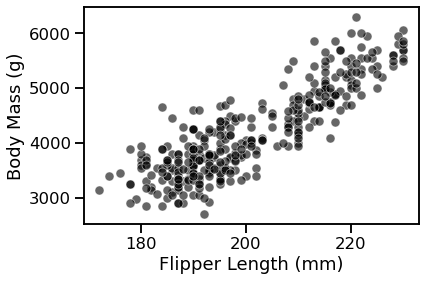

In [34]:
import seaborn as sns

sns.scatterplot(x=data["Flipper Length (mm)"], y=target, color='black', alpha=0.6)

In [35]:
data["Flipper Length (mm)"].min(), data["Flipper Length (mm)"].max()

(172.0, 230.0)

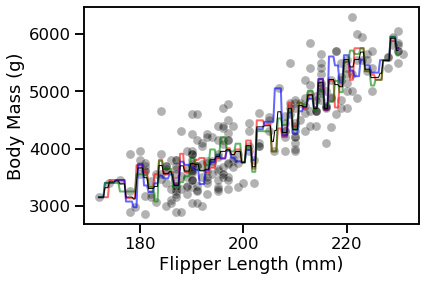

In [36]:
import numpy as np
import matplotlib.pyplot as plt
rndforest.fit(data, target)

# Create an artificial test set
data_test = np.linspace(data["Flipper Length (mm)"].min(), data["Flipper Length (mm)"].max(), 200)
data_test = data_test.reshape(-1,1)

# 3 decision tree predictions
pred1 = rndforest.estimators_[0].predict(data_test)
pred2 = rndforest.estimators_[1].predict(data_test)
pred3 = rndforest.estimators_[2].predict(data_test)

# Random forest prediction
pred = rndforest.predict(data_test)

# Plot data, 3 decision tree predictions, random forest prediction
sns.scatterplot(x=data_train["Flipper Length (mm)"], y=target_train, color='black', alpha=0.3)
plt.plot(data_test, pred1, linewidth=2, color='red', alpha=.6)
plt.plot(data_test, pred2, linewidth=2, color='blue', alpha=.6)
plt.plot(data_test, pred3, linewidth=2, color='green', alpha=.6)
plt.plot(data_test, pred, linewidth=1, color='black', alpha=1)


The random forest prediction (black line) is smoother than the 3 individual decision tree predictions.

In [41]:
rndforest.estimators_[0].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1608637542,
 'splitter': 'best'}

In [44]:
rndforest.estimators_[0].get_depth(), rndforest.estimators_[0].get_n_leaves()

(9, 52)

In [38]:
data_test_uni = data.drop_duplicates().sort_values("Flipper Length (mm)")
target_test_uni = target.loc[data_test_uni.index]